In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape

(1156, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
dataset['PURPOSE'].isnull().sum()  # Should return 0 if all NaNs are filled

np.int64(503)

In [6]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')

In [7]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 1, 'START': 69, 'STOP': 74, 'PURPOSE': 6, 'date': 85}

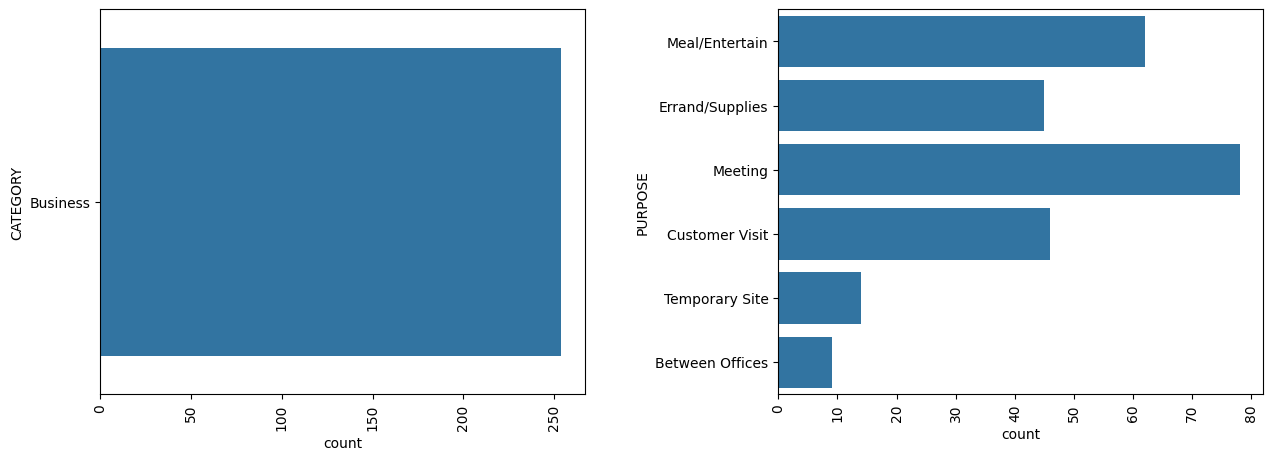

In [11]:
plt.figure(figsize=(15, 5))  # Adjust width for more space

# First plot
plt.subplot(1, 2, 1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

# Second plot
plt.subplot(1, 2, 2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

# Adjust space between plots (increase wspace value for more gap)
plt.subplots_adjust(wspace=0.4)  # You can increase this (e.g., 0.5, 0.6) for more space

plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

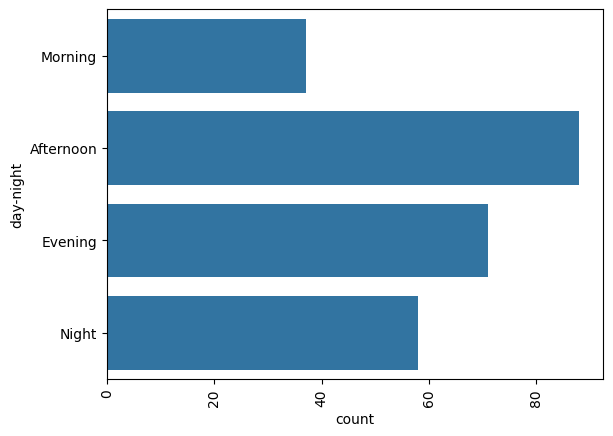

In [12]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

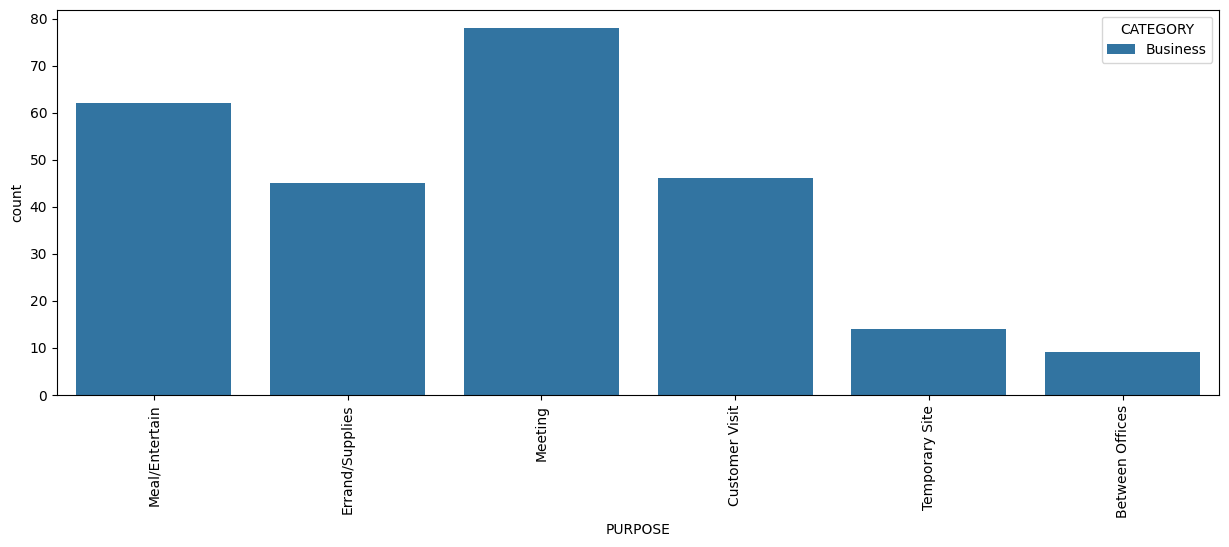

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output instead of sparse
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))

# Maintain index and column names
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop original categorical columns and concatenate the new one-hot encoded columns
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

<Axes: >

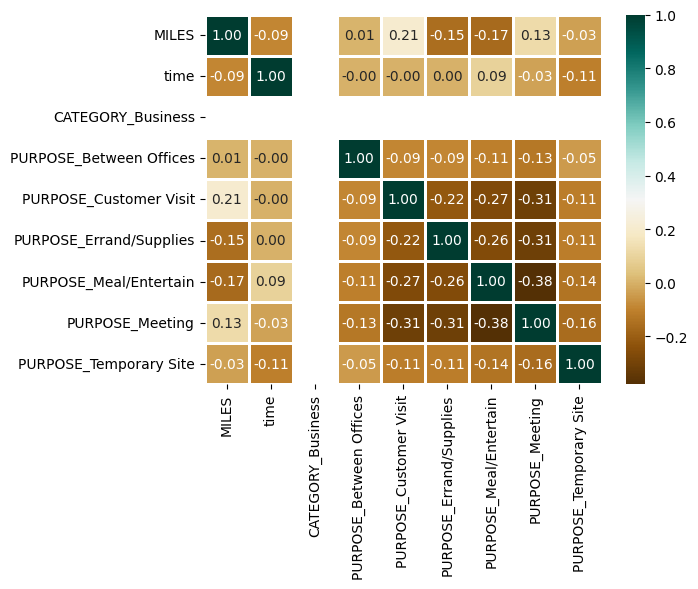

In [15]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

# Now you can create the heatmap
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

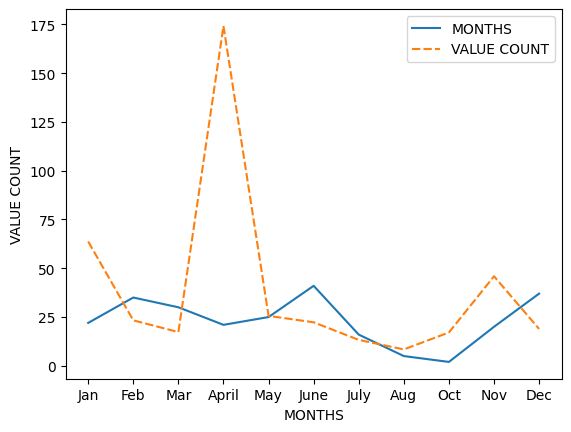

In [16]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [17]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

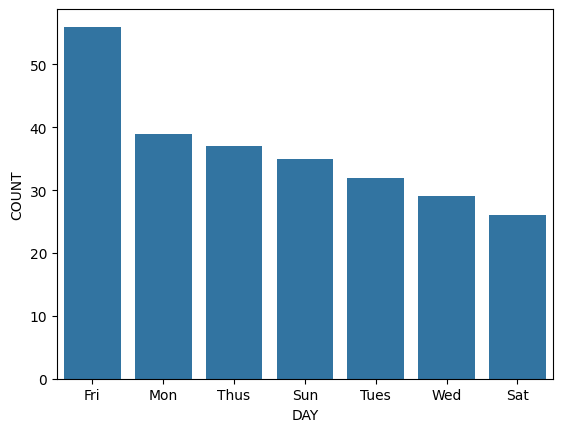

In [18]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

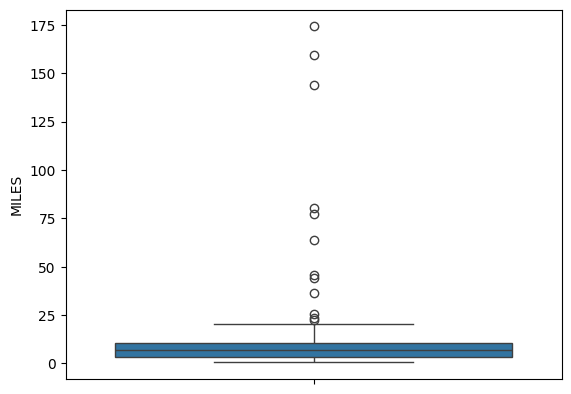

In [19]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

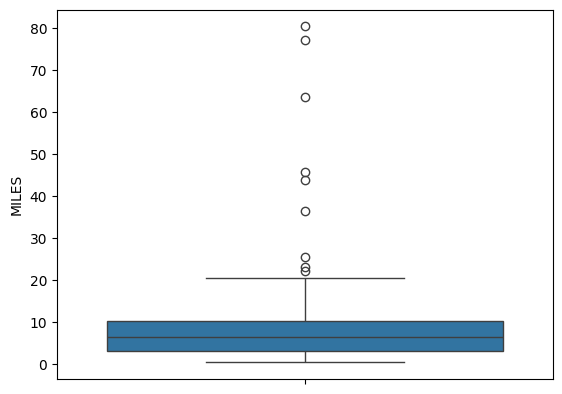

In [20]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<Axes: xlabel='MILES', ylabel='Count'>

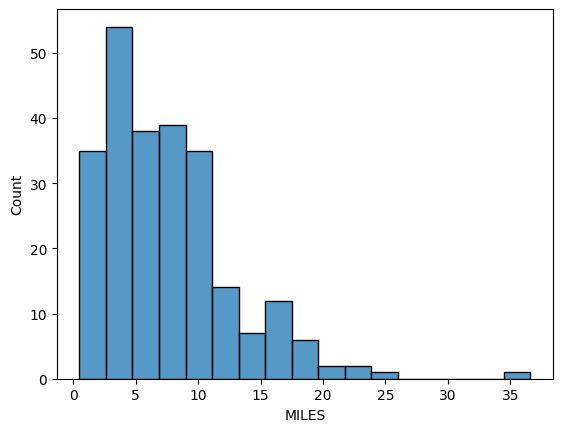

In [21]:
sns.histplot(dataset[dataset['MILES']<40]['MILES'])